<a href="https://colab.research.google.com/github/usnhee/TIL-/blob/master/simpleRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import imdb 
from keras.preprocessing import sequence 

max_features =10000
maxlen = 500 
batch_size = 32

print('Loading Data...')
(input_train, y_train), (input_test, y_test)= imdb.load_data(num_words = max_features)
print(len(input_train), 'train sequences') 
print(len(input_test), 'test sequences') 
print('Pad sequences (samples x time)') 
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape) 
print('input_test shape:', input_test.shape)

Loading Data...
17473536/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [4]:
from keras.models import Sequential
from keras.layers import Embedding ,Dense , SimpleRNN

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid')) 
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 30s 181ms/step - loss: 0.5868 - acc: 0.6844 - val_loss: 0.4440 - val_acc: 0.7968
Epoch 2/10
157/157 [==============================] - 25s 157ms/step - loss: 0.3754 - acc: 0.8423 - val_loss: 0.5080 - val_acc: 0.7896
Epoch 3/10
157/157 [==============================] - 24s 151ms/step - loss: 0.2850 - acc: 0.8877 - val_loss: 0.7615 - val_acc: 0.7434
Epoch 4/10
157/157 [==============================] - 24s 154ms/step - loss: 0.2242 - acc: 0.9132 - val_loss: 0.3442 - val_acc: 0.8526
Epoch 5/10
157/157 [==============================] - 24s 154ms/step - loss: 0.1759 - acc: 0.9345 - val_loss: 0.4306 - val_acc: 0.8032
Epoch 6/10
157/157 [==============================] - 25s 158ms/step - loss: 0.1289 - acc: 0.9546 - val_loss: 0.4158 - val_acc: 0.8344
Epoch 7/10
157/157 [==============================] - 24s 151ms/step - loss: 0.0942 - acc: 0.9687 - val_loss: 0.4252 - val_acc: 0.8676
Epoch 8/10
157/157 [==============================] - 2

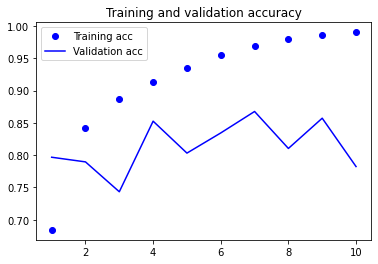

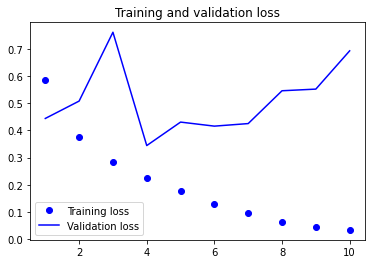

In [5]:
import matplotlib.pyplot as plt 
acc = history.history['acc'] 
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss'] 
epochs = range(1, len(acc) + 1) 
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy')
plt.legend() 
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss') 
plt.legend() 
plt.show()